In [2]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())


2.7.0+cu126
False


In [3]:
import math
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
def f(x):
    print("f(x) called with x =", x)
    return 3*x**2 + 2*x + 1

In [5]:
f(3.0)

f(x) called with x = 3.0


34.0

f(x) called with x = [-5.   -4.75 -4.5  -4.25 -4.   -3.75 -3.5  -3.25 -3.   -2.75 -2.5  -2.25
 -2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
  1.    1.25  1.5   1.75  2.    2.25  2.5   2.75  3.    3.25  3.5   3.75
  4.    4.25  4.5   4.75]


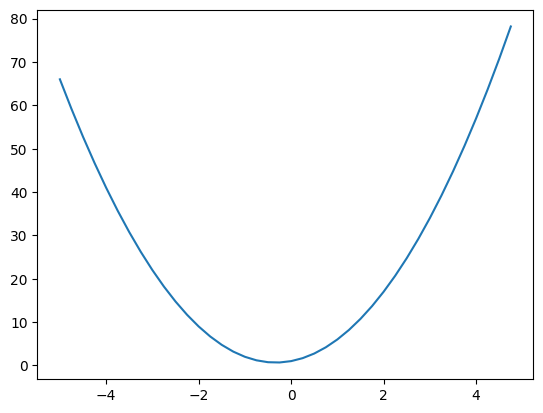

In [6]:
xs= np.arange(-5, 5, 0.25)
ys = f(xs)
plt.plot(xs, ys)

In [7]:
h = 0.000000001
x= -0.5
(f(x+h)-f(x))/h  # numerical derivative at x=-3.0

f(x) called with x = -0.499999999
f(x) called with x = -0.5


-0.9999999717180684

In [8]:
a = 3.0
b = 2.0
c = 1.0
d = a*b + c
print("d =", d)

d = 7.0


In [9]:
h=0.000000001
a = 3.0
b = 2.0
c = 1.0

d1 = a*b + c

a+=h
d2 = a*b + c

print("d1 =", d1)
print("d2 =", d2)
print("d2 - d1 =", d2 - d1)
print("d2 - d1 / h =", (d2 - d1) / h)

d1 = 7.0
d2 = 7.000000002
d2 - d1 = 2.000000165480742e-09
d2 - d1 / h = 2.000000165480742


In [10]:
h=0.000000001
a = 3.0
b = 2.0
c = 1.0

d1 = a*b + c

b+=h
d2 = a*b + c

print("d1 =", d1)
print("d2 =", d2)
print("d2 - d1 =", d2 - d1)
print("d2 - d1 / h =", (d2 - d1) / h)

d1 = 7.0
d2 = 7.000000003
d2 - d1 = 3.000000248221113e-09
d2 - d1 / h = 3.000000248221113


In [11]:
h=0.000000001
a = 3.0
b = 2.0
c = 1.0

d1 = a*b + c

c+=h # derivative with respect to c
d2 = a*b + c

print("d1 =", d1)
print("d2 =", d2)
print("d2 - d1 =", d2 - d1)
print("d2 - d1 / h =", (d2 - d1) / h)


d1 = 7.0
d2 = 7.000000001
d2 - d1 = 1.000000082740371e-09
d2 - d1 / h = 1.000000082740371


In [12]:
class Value:
    def __init__(self,data,_children=(),_op='',label = ''):
        self.data = data
        self._prev = set(_children)  # previous nodes in the computation graph
        self._op = _op # operation that produced this value
        self.label = label
        self.grad = 0.0  # gradient, not used in this example but can be useful for backpropagation
    def __repr__(self):
        return f"Value({self.data})"
    def __add__(self, other):
        return Value(self.data + other.data, (self, other),'+') # the children of d are self a and other which is b
    def __mul__(self, other):
        return Value(self.data * other.data, (self, other),'*') # 
    def tanh(self):
        # return Value(math.tanh(self.data), (self,), 'tanh')
        n= self.data
        t = (math.exp(2*n) - 1) / (math.exp(2*n) + 1)
        return Value(t, (self,), 'tanh')
    

a= Value(3.0, label='a') # create a Value object for a
b= Value(2.0, label='b') # create a Value object for b
c= Value(1.0, label='c') # create a Value object for c

# d= a+b # a.__add__(b) should be called
# a*b # a.__mul__(b) should be called
# d=a*b +c # (a.__mul__(b)).__add__(c) should be called
# type(d),d._prev,d._op


e= a * b  # this will call the __add__ and __mul__ methods of the Value class
e.label = 'e'  # label the result
d = e + c  # this will call the __add__ method of the Value class
d.label = 'd'  # label the result
f=Value(0.2,  label = 'f')
L=  d * f
L.label = 'L'  # label the loss  
# print("d =", d)
print("L =", L)


L = Value(1.4000000000000001)


In [13]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

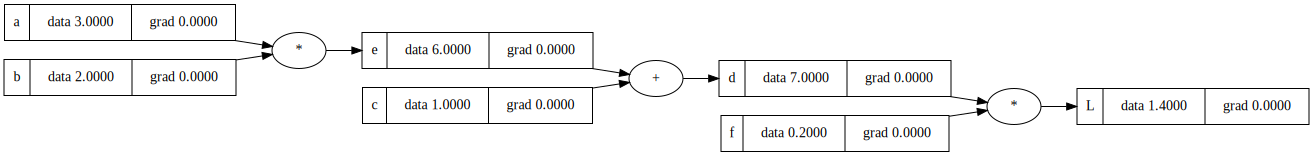

In [14]:
draw_dot(L)

In [15]:
L= d*f
# dl/dd=?
dl_dd = f.data  # derivative of L with respect to d
print("dl/dd =", dl_dd)
h=0.000000001
# derivate of L with respect to d 
d1 = d.data * f.data  # L = d*f
d.data += h
d2 = d.data * f.data  # L = d*f
print("d1 =", d1)
print("d2 =", d2)
print("d2 - d1 =", d2 - d1)
print("d2 - d1 / h =", (d2 - d1) / h)



dl_df = d.data  # derivative of L with respect to f
print("dl/df =", dl_df)

dl/dd = 0.2
d1 = 1.4000000000000001
d2 = 1.4000000002000001
d2 - d1 = 2.000000165480742e-10
d2 - d1 / h = 0.2000000165480742
dl/df = 7.000000001


In [16]:
# dL / dc
# d= e + c
#  
dd_dc = 1.0
print("dd/dc =", dd_dc)
dl_dc = d.grad * dd_dc  # derivative of L with respect to c dl_dc = dl/dd * dd/dc
print("dl/dc =", dl_dc)

dd/dc = 1.0
dl/dc = 0.0


In [17]:
# dl_da 
# dl_da = dl_de*de_da
# e = a * b
dl_de = e.grad
de_da = b.data  # derivative of e with respect to a
dl_da = dl_de * de_da  # derivative of L with respect to a
print("dl/da =", dl_da)


# dl_db
de_db = a.data  # derivative of e with respect to b
dl_db = dl_de * de_db  # derivative of L with respect to b
print("dl/db =", dl_db)

dl/da = 0.0
dl/db = 0.0


In [18]:
L.grad = 1.0  # set the gradient of the loss to 1.0
f.grad = L.grad * dl_df  # backpropagate the gradient to f  
d.grad = L.grad * dl_dd  # backpropagate the gradient to d
c.grad = dl_dc  # backpropagate the gradient to c
e.grad = dl_dc # by symmetry, e.grad = d.grad
a.grad =dl_da  # backpropagate the gradient to a
b.grad = dl_db  # by symmetry, b.grad = e.grad




In [19]:
def lol():
    h = 0.000000001
    
    
    a= Value(3.0, label='a') # create a Value object for a
    b= Value(2.0, label='b') # create a Value object for b
    c= Value(1.0, label='c') # create a Value object for c
    e= a * b  # this will call the __add__ and __mul__ methods of the Value class
    d = e + c  # this will call the __add__ method of the Value class
    f=Value(0.2,  label = 'f')
    L=  d * f
    L.label = 'L'  # label the loss
    L1 = L.data



    # a= Value(3.0+h, label='a') # create a Value object for a
    a= Value(3.0, label='a') # create a Value object for a
    b= Value(2.0+h, label='b') # create a Value object for b
    c= Value(1.0, label='c') # create a Value object for c
    # c.data += h  # simulate the change in c
    e= a * b  # this will call the __add__ and __mul__ methods of the Value class
    # e.data += h  # simulate the change in e
    d = e + c  # this will call the __add__ method of the Value class
    # d.data += h  # simulate the change in a
    f=Value(0.2,  label = 'f')
    L=  d * f
    L.label = 'L'  # label the loss
    L2 = L.data
    # L2 = L.data + h # we add h to the loss to simulate the change in a
    print("L1 =", L1)
    print("L2 =", L2)
    # print("L2 - L1 =", L2 - L1) # this should be the derivative of L with respect to a


    # print("L2 - L1 / h =", (L2 - L1) / h) # this should be the derivative of L with respect to a
    print("L2 - L1 / h =", (L2 - L1) / h) # this should be the derivative of L with respect to L will be 

lol()



L1 = 1.4000000000000001
L2 = 1.4000000006000002
L2 - L1 / h = 0.6000000496442226


Example 2

In [20]:
import numpy as np

In [21]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'


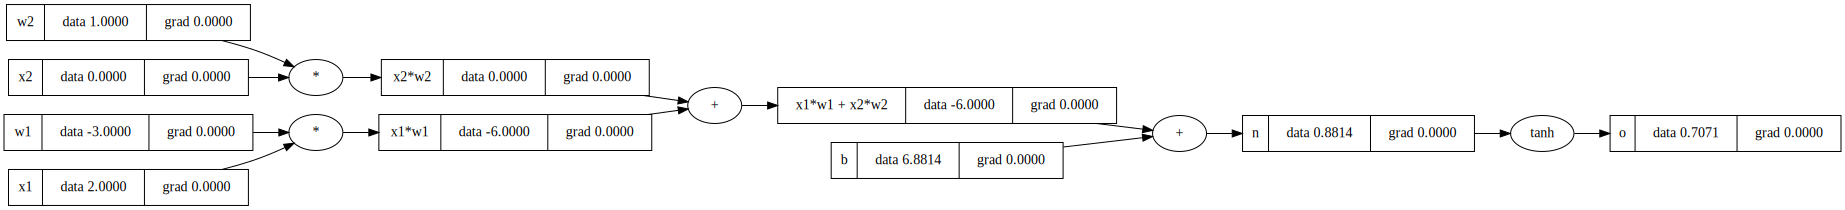

In [22]:
draw_dot(o)

In [23]:
# o  = tanh (n)
do_dn = 1.0 - o.data**2  # derivative of o with respect to n
do_dn

0.4999999999999999

In [24]:
#x1w1x2w2 = x1*w1 + x2*w2
# n = x1w1x2w2 + b
# do_dx1w1x2w2 = do_dn* dn_dx1w1x2w2 
dn_dx1w1x2w2 = 1.0  # derivative of n with respect to x1w1x2w2
do_dx1w1x2w2 = do_dn * dn_dx1w1x2w2  # derivative of o with respect to x1w1x2w2
do_db = do_dn * 1.0  # derivative of o with respect to b
print("do_dn =", do_dn)
print("do_dx1w1x2w2 =", do_dx1w1x2w2)
print("do_db =", do_db)

do_dn = 0.4999999999999999
do_dx1w1x2w2 = 0.4999999999999999
do_db = 0.4999999999999999


In [25]:
#x1w1x2w2 = x1*w1 + x2*w2
#do_dx1w1 = do_dx1w1x2w2 * dx1w1x2w2_dx1w1
dx1w1x2w2_dx1w1 = 1.0  # derivative of x1w1x2w2 with respect to x1w1
do_dx1w1 = do_dx1w1x2w2 * dx1w1x2w2_dx1w1  # derivative of o with respect to x1w1
do_dx2w2 = do_dx1w1x2w2 * 1.0  # derivative of o with respect to x2w2
print("do_dx1w1 =", do_dx1w1)
print("do_dx2w2 =", do_dx2w2)

do_dx1w1 = 0.4999999999999999
do_dx2w2 = 0.4999999999999999


In [26]:
# x1w1 = x1*w1
# do_dx1 = do_dx1w1 * w1.data  # derivative of o with respect to x1
do_dx1 = do_dx1w1 * w1.data  # derivative of o with respect to x1
do_dx2 = do_dx2w2 * w2.data  # derivative of o with respect to x2
print("do_dx1 =", do_dx1)
print("do_dx2 =", do_dx2)


do_dw1 = do_dx1w1 * x1.data  # derivative of o with respect to w1
do_dw2 = do_dx2w2 * x2.data  # derivative of o with respect to w2
print("do_dw1 =", do_dw1)

do_dx1 = -1.4999999999999996
do_dx2 = 0.4999999999999999
do_dw1 = 0.9999999999999998


In [27]:
o.grad = 1.0  # set the gradient of the output to 1.0
n.grad = do_dn
x1w1x2w2.grad = do_dx1w1x2w2  # backpropagate the gradient to x1w1x2w2
b.grad = do_db  # backpropagate the gradient to b
x1w1.grad = do_dx1w1  # backpropagate the gradient to x1w1
x2w2.grad = do_dx2w2  # backpropagate the gradient to x2w2
x1.grad = do_dx1  # backpropagate the gradient to x1
x2.grad = do_dx2  # backpropagate the gradient to x2
w1.grad = do_dw1  # backpropagate the gradient to w1
w2.grad = do_dw2  # backpropagate the gradient to w2    


Implementing Value Class with back prop

In [82]:
class Value:
  
  def __init__(self, data, _children=(), _op='', label=''):
    self.data = data
    self.grad = 0.0
    self._backward = lambda: None
    self._prev = set(_children)
    self._op = _op
    self.label = label

  def __repr__(self):
    return f"Value(data={self.data})"
  
  def __add__(self, other):
    other = other if isinstance(other, Value) else Value(other)  # ensure other is a Value
    out = Value(self.data + other.data, (self, other), '+')
    
    def _backward():
      # print("Backward pass for addition")
      # print(self.label)
      self.grad += 1.0 * out.grad # we need to add this when  same Value is used  in multiple operations 
      # multivariable chain rule 
      # When a variable is used in multiple places in the computation graph,
      # its total derivative is the sum of the derivatives from all paths.
      # For example, if z = x + y and L is the final output,
      # then dL/dx = dL/dz * dz/dx, and if x is used in multiple places,
      # we accumulate (+=) the gradients from each path.
      other.grad += 1.0 * out.grad
    out._backward = _backward
    
    return out

  def __mul__(self, other):
    out = Value(self.data * other.data, (self, other), '*')
    
    def _backward():
      self.grad += other.data * out.grad 
      other.grad += self.data * out.grad
    out._backward = _backward
      
    return out
  
  def tanh(self):
    x = self.data
    t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
    out = Value(t, (self, ), 'tanh')
    
    def _backward():
      self.grad += (1 - t**2) * out.grad
    out._backward = _backward
    
    return out
  
  def backward(self):
    topo = [] # topological order of nodes
    visited = set()
    def build_topo(v):
      if v not in visited:
        visited.add(v)
        for child in v._prev:
          build_topo(child)
        topo.append(v)
    build_topo(self)
    self.grad = 1.0  # set the gradient of the output to 1.0
    for node in reversed(topo):
      node._backward()  # call the backward function of each node in reverse topological order




In [74]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'


In [76]:
o.backward()  # perform the backward pass

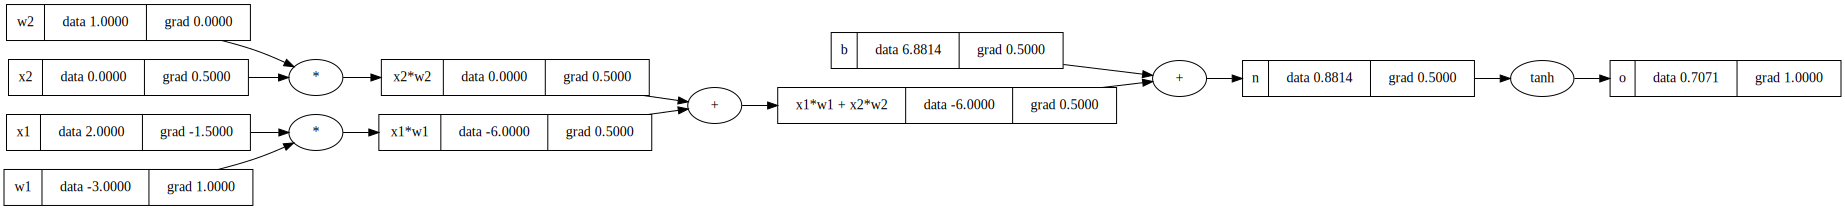

In [77]:
draw_dot(o)

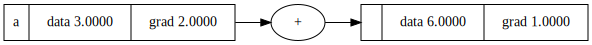

In [78]:
a = Value(3.0, label='a') # create a Value object for a
b =a + a
b.backward()  # perform the backward pass
draw_dot(b)

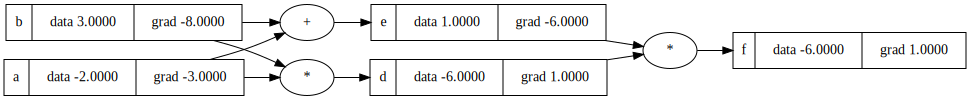

In [81]:
a = Value(-2.0, label='a') # create a Value object for a
b = Value(3.0, label='b') # create a Value object for b
d = a * b  # this will call the __add__ and __mul__ methods of the Value class
d.label = 'd'  # label the result
e = a + b   # this will call the __add__ method of the Value class
e.label = 'e'  # label the result
f = d * e   # this will call the __mul__ method of the Value class
f.label = 'f'  # label the result
f.backward()  # perform the backward pass
draw_dot(f)

## 🧮 Multivariate Chain Rule — Explained

When dealing with **computational graphs** or **automatic differentiation**, we often use the **chain rule** to compute gradients. In the **multivariate case**, a variable can influence the final output through **multiple paths**, and we must account for **all those contributions**.

---

### 🔗 Chain Rule — Basic Idea

For a function composition:

$$
z = f(g(x))
$$

The chain rule tells us:

$$
\frac{dz}{dx} = \frac{df}{dg} \cdot \frac{dg}{dx}
$$

---

### 🧩 Multivariate Case

Now suppose:

* $L$ is the final loss/output.
* $z = x + y$
* $x = a \cdot b$
* $y = a \cdot c$

Then the computation graph looks like:

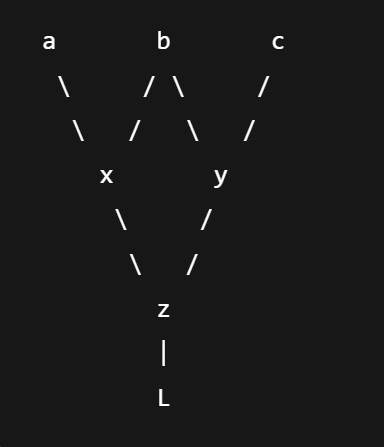



We can see that:

* $a$ affects both $x$ and $y$
* So, the gradient $\frac{dL}{da}$ must include **both paths**:

---

### 🧠 Apply Chain Rule

Using the chain rule:

$$
\frac{dL}{da} = \frac{dL}{dz} \cdot \left( \frac{dz}{dx} \cdot \frac{dx}{da} + \frac{dz}{dy} \cdot \frac{dy}{da} \right)
$$

But since $z = x + y$, we have $\frac{dz}{dx} = 1$ and $\frac{dz}{dy} = 1$. Also:

* $x = ab \Rightarrow \frac{dx}{da} = b$
* $y = ac \Rightarrow \frac{dy}{da} = c$

So:

$$
\frac{dL}{da} = \frac{dL}{dz} \cdot (1 \cdot b + 1 \cdot c) = \frac{dL}{dz} \cdot (b + c)
$$

---

### ✅ Summary

When a variable is used in multiple places in the graph, **you must accumulate gradients** from all paths:

$$
\text{Total Gradient} = \sum_{\text{all paths}} \left( \text{local gradient along path} \cdot \text{incoming gradient} \right)
$$

That’s why in backpropagation, we use `+=` instead of `=` when computing gradients:

```python
self.grad += local_derivative * out.grad


In [ ]:
import math

class Value:
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad = 0.0
        self._backward = lambda: None  # Placeholder until a proper backward function is set
        self._prev = set(_children)    # References to input nodes
        self._op = _op                 # Operation that produced this value
        self.label = label             # Optional label for debugging or visualization

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data + other.data, (self, other), '+')

        def _backward():
            # Gradient of addition is distributed equally
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad

        out._backward = _backward
        return out

    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data * other.data, (self, other), '*')

        def _backward():
            # d(out)/d(self) = other.data
            # d(out)/d(other) = self.data
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad

        out._backward = _backward
        return out
    def __rmul__(self, other): 
        # __rmul__: Called when b * a and b doesn’t know how to multiply a
        return self * other



    def tanh(self):
        x = self.data
        t = (math.exp(2 * x) - 1) / (math.exp(2 * x) + 1)  # tanh(x)
        out = Value(t, (self,), 'tanh')

        def _backward():
            # Derivative of tanh is 1 - tanh(x)^2
            self.grad += (1 - t**2) * out.grad

        out._backward = _backward
        return out
    def exp(self):
        x = self.data
        out = Value(math.exp(x), (self,), 'exp')
        def _backward():
            # Derivative of exp(x) is exp(x)
            self.grad += out.data * out.grad
        out._backward = _backward
        return out



    def backward(self):
        topo = []         # List of nodes in topological order
        visited = set()

        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)

        build_topo(self)
        self.grad = 1.0    # Seed gradient
        for node in reversed(topo):
            node._backward()


In [93]:
a = Value(3.0, label='a') # create a Value object for a
a + 1, a * 2 , 2 *a 


(Value(data=4.0), Value(data=6.0), Value(data=6.0))